<a href="https://colab.research.google.com/github/cam2149/AnalisisDatosI/blob/main/EntregableFinal_AnalisisMultivariado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img height="45px" src="https://drive.google.com/uc?id=1dusNXTL_M0CB5BJDB_GCvTKNCqYz10U6"align="left" hspace="10px" vspace="0px"></p>

<h1>Preparación de los datos</h1>


---

# **Introducción**

Cuando se realiza un proceso de comprensión de los datos, es posible encontrar algunos problemas potenciales que deben abordarse antes de la estapa de modelado.
En este entregable, se manejaran algunos problemas frecuentes de calidad de datos y preparar el conjunto de datos correctamente (instancias o atributos duplicados o irrelevantes, valores incorrectos, valores perdidos).
<br>Se realizará exploración de los datos a través de estadistica descriptiva
<br>El archivo CSV proporcionado contiene una serie de datos del sistema de gestión de transacciones de compra de PIN para exámenes medicos y cursos de cunducción, estos involucran identificación de usuarios, transacciones de compra y otros datos personales.


#Diccionario de datos
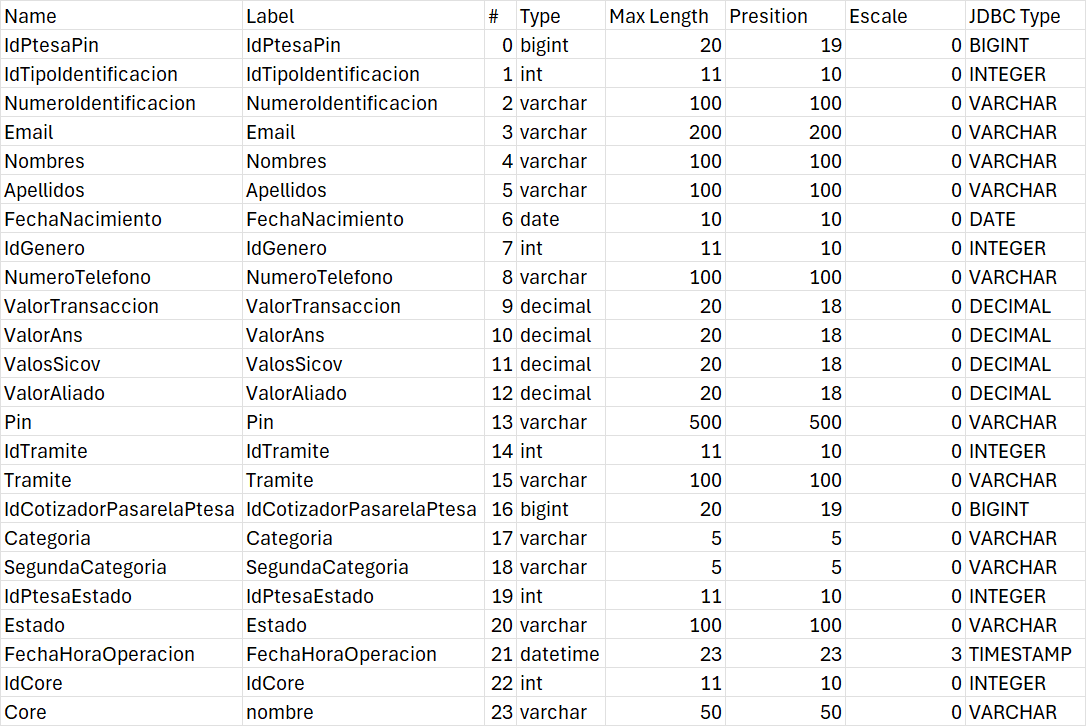

In [1]:
# Importar librería pandas y numpy
# Pandas es una librería de Python que proporciona estructuras de datos y herramientas de análisis de datos de alto rendimiento
import pandas as pd
# NumPy es una librería de Python que proporciona estructuras de datos y operaciones matemáticas de alto rendimiento.
import numpy as np
#Matplotlib.pyplot es una librería de Python que proporciona herramientas de visualización y gráficos de alta calidad.
import matplotlib.pyplot as plt
from IPython.display import Math, Latex
from IPython.core.display import Image
#Seaborn es una librería de Python que proporciona herramientas de visualización y análisis de datos de alta calidad.
import seaborn as sns

#sns.set(color_codes=True) es un método de la librería Seaborn que establece los códigos de color predeterminados para los gráficos y diagramas. Cuando se establece color_codes=True, Seaborn utiliza una paleta de colores predefinida y asigna un código de color a cada categoría o variable en los gráficos y diagramas.
sns.set(color_codes=True)
#Cuando se establece rc={'figure.figsize':(10,6)}, Seaborn crea figuras con un tamaño de 10 unidades de ancho y 6 unidades de alto.
sns.set(rc={'figure.figsize':(10,6)})


In [2]:
#**Importar los datos**
#Para iniciar, importe la librería pandas y lea el archivo CSV que contiene el *dataset*, utilizando el método ```read_csv()```y
#la dirección URL https://raw.githubusercontent.com/cam2149/eda_couse/main/data/data.csv que almacena los datos.

filename = "https://raw.githubusercontent.com/cam2149/eda_couse/main/data/data.csv"
# Lista de encabezados o nombres de los atributos
headers = ["IdPtesaPin","IdTipoIdentificacion","NumeroIdentificacion","Email","Nombres","Apellidos","FechaNacimiento","IdGenero","NumeroTelefono","ValorTransaccion","ValorAns","ValosSicov","ValorAliado","Pin","IdTramite","Tramite","IdCotizadorPasarelaPtesa","Categoria","SegundaCategoria","IdPtesaEstado","Estado","FechaHoraOperacion","IdCore","Core"]

tramitesdf = pd.read_csv(filename, names= headers, encoding='latin-1', header=1)

Utilice el método ```head()```para visualizar las primeras cinco filas del *data frame*.

In [3]:
# Para ver cómo luce el dataset tramitesdf, utilizamos el método head().
tramitesdf.head()

,IdPtesaPin,IdTipoIdentificacion,NumeroIdentificacion,Email,Nombres,Apellidos,FechaNacimiento,IdGenero,NumeroTelefono,ValorTransaccion,...,IdTramite,Tramite,IdCotizadorPasarelaPtesa,Categoria,SegundaCategoria,IdPtesaEstado,Estado,FechaHoraOperacion,IdCore,Core
0,319271,1,79658128,gramos@olimpiait.com,Gina Harletty,Ramos Gutierrez,'1990-01-17',2,3.142351e+09,101979,...,1,Primera Vez,317014,B1,NaN,6,Referencia Vencida,'2023-11-18 00:55:01.417',2,Olimpia
1,319272,1,79658128,gramos@olimpiait.com,Gina Harletty,Ramos Gutierrez,'1990-01-17',2,3.142351e+09,101979,...,1,Primera Vez,317015,B1,NaN,2,Activo,'2021-09-24 11:56:13.063',2,Olimpia
2,319273,2,S545454,clientecrc@yopmail.com,Andres,Moreno,'1989-09-09',1,3.118692e+09,149232,...,1,Primera Vez,317016,B1,NaN,2,Activo,'2021-09-24 15:06:10.310',4,Ceas
3,319275,5,EE989898,clientecrc@yopmail.com,Andrea,Moreno,'1988-08-08',2,3.118692e+09,149132,...,1,Primera Vez,317017,A2,NaN,4,Usado,'2021-09-27 09:34:17.543',4,Ceas
4,319302,5,A283848,clientecrc@yopmail.com,Camila,Argos,'1990-10-10',1,3.118692e+09,149232,...,1,Primera Vez,317018,B1,NaN,2,Activo,'2021-09-27 16:02:11.050',4,Ceas


In [4]:
tramitesdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4431 entries, 0 to 4430
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   IdPtesaPin                4431 non-null   int64  
 1   IdTipoIdentificacion      4431 non-null   int64  
 2   NumeroIdentificacion      4431 non-null   object 
 3   Email                     4414 non-null   object 
 4   Nombres                   4431 non-null   object 
 5   Apellidos                 4431 non-null   object 
 6   FechaNacimiento           4431 non-null   object 
 7   IdGenero                  4431 non-null   int64  
 8   NumeroTelefono            4414 non-null   float64
 9   ValorTransaccion          4431 non-null   int64  
 10  ValorAns                  4431 non-null   int64  
 11  ValosSicov                4431 non-null   int64  
 12  ValorAliado               4431 non-null   int64  
 13  Pin                       4431 non-null   int64  
 14  IdTramit

In [5]:
# Para ver los tipos datos que tiene dataset, utilizamos el método df.dtypes.
tramitesdf.dtypes

,0
IdPtesaPin,int64
IdTipoIdentificacion,int64
NumeroIdentificacion,object
Email,object
Nombres,object
Apellidos,object
FechaNacimiento,object
IdGenero,int64
NumeroTelefono,float64
ValorTransaccion,int64



## Limpieza de Datos
## Identificar valores perdidos

En nuestro conjunto de datos, los datos perdidos están marcados con un signo de interrogación "?". Para que pandas reconozca la existencia de valores perdidos dentro del *data frame*, es necesarios identificarlos y realizar el replace correspondiente, existen diferentes estrategias para realizar esta transformación.
<br><br>
Identificaremos dentro del variable **precio** los datos en **?** Utilizaremos la función ```.replace(A, B, inplace = True)```para reemplazar A por B. Para poder utilizar esta función, debe importar la librería ```numpy```.


In [6]:
#Establecer el valor faltante como media del valorTransaccion y convertir el tipo de datos a entero
valorTransaccion = tramitesdf['ValorTransaccion'].loc[tramitesdf['ValorTransaccion'] != '?']
vtmean = valorTransaccion.astype(str).astype(int).mean()
tramitesdf['ValorTransaccion'] = tramitesdf['ValorTransaccion'].replace('?',vtmean).astype(int)
tramitesdf['ValorTransaccion'].head()

,ValorTransaccion
0,101979
1,101979
2,149232
3,149132
4,149232


In [7]:
from sklearn.impute import KNNImputer

# Construimos el modelo
imputer = KNNImputer(n_neighbors=5, weights="uniform")

# Entrenamos el modelo
imputer.fit(tramitesdf[["ValorTransaccion"]])

#Reemplazamos los valores nulos
tramitesdf["ValorTransaccion"] = imputer.transform(tramitesdf[["ValorTransaccion"]]).ravel()


* ***Convertir "?" a NaN***

En nuestro conjunto de datos, los datos perdidos están marcados con un signo de interrogación "?". Otra estrategia es usar el marcador predeterminado que utiliza Python es **NaN (Not a Number)**.
<br><br>
Utilizaremos la función ```.replace(A, B, inplace = True)```para reemplazar A por B. Para poder utilizar esta función, debe importar la librería ```numpy```.

In [8]:
import numpy as np

# Reemplazar "?" por NaN
tramitesdf.replace("?", np.nan, inplace = True)
tramitesdf.head(5)

,IdPtesaPin,IdTipoIdentificacion,NumeroIdentificacion,Email,Nombres,Apellidos,FechaNacimiento,IdGenero,NumeroTelefono,ValorTransaccion,...,IdTramite,Tramite,IdCotizadorPasarelaPtesa,Categoria,SegundaCategoria,IdPtesaEstado,Estado,FechaHoraOperacion,IdCore,Core
0,319271,1,79658128,gramos@olimpiait.com,Gina Harletty,Ramos Gutierrez,'1990-01-17',2,3.142351e+09,101979.0,...,1,Primera Vez,317014,B1,NaN,6,Referencia Vencida,'2023-11-18 00:55:01.417',2,Olimpia
1,319272,1,79658128,gramos@olimpiait.com,Gina Harletty,Ramos Gutierrez,'1990-01-17',2,3.142351e+09,101979.0,...,1,Primera Vez,317015,B1,NaN,2,Activo,'2021-09-24 11:56:13.063',2,Olimpia
2,319273,2,S545454,clientecrc@yopmail.com,Andres,Moreno,'1989-09-09',1,3.118692e+09,149232.0,...,1,Primera Vez,317016,B1,NaN,2,Activo,'2021-09-24 15:06:10.310',4,Ceas
3,319275,5,EE989898,clientecrc@yopmail.com,Andrea,Moreno,'1988-08-08',2,3.118692e+09,149132.0,...,1,Primera Vez,317017,A2,NaN,4,Usado,'2021-09-27 09:34:17.543',4,Ceas
4,319302,5,A283848,clientecrc@yopmail.com,Camila,Argos,'1990-10-10',1,3.118692e+09,149232.0,...,1,Primera Vez,317018,B1,NaN,2,Activo,'2021-09-27 16:02:11.050',4,Ceas


* ***Evaluar los datos perdidos***
Una vez convertidos los datos perdidos a los valores predeterminados de Python, pasamos a utilizar funciones integradas de Python que nos permiten identificar estos datos. Hay tres métodos para detectar valores perdidos: ```.isnull()```, ```.notnull()``` y ```.isna()```. Sus salidas son un valor booleano que indica si el valor que se pasa en los argumentos es un dato perdido.

In [9]:
missing_data = tramitesdf.isnull()
missing_data.head(5)

,IdPtesaPin,IdTipoIdentificacion,NumeroIdentificacion,Email,Nombres,Apellidos,FechaNacimiento,IdGenero,NumeroTelefono,ValorTransaccion,...,IdTramite,Tramite,IdCotizadorPasarelaPtesa,Categoria,SegundaCategoria,IdPtesaEstado,Estado,FechaHoraOperacion,IdCore,Core
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


En el ejemplo anterior, "True" significa valor perdido, mientras que "False" significa valor no perdido.

* ***Contar los valores perdidos de cada columna***

Utilizando un bucle ```for``` podemos calcular el número de valores perdidos de cada columna. Como se mencionó anteriormente, "True" representa un valor faltante, mientras que "False" significa que el valor sí está presente en el conjunto de datos. En el cuerpo del bucle ```for``` que ejecutará a continuación, el método ```.value_counts()``` cuenta el número de valores "True".

In [10]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

IdPtesaPin
IdPtesaPin
False    4431
Name: count, dtype: int64

IdTipoIdentificacion
IdTipoIdentificacion
False    4431
Name: count, dtype: int64

NumeroIdentificacion
NumeroIdentificacion
False    4431
Name: count, dtype: int64

Email
Email
False    4414
True       17
Name: count, dtype: int64

Nombres
Nombres
False    4431
Name: count, dtype: int64

Apellidos
Apellidos
False    4431
Name: count, dtype: int64

FechaNacimiento
FechaNacimiento
False    4431
Name: count, dtype: int64

IdGenero
IdGenero
False    4431
Name: count, dtype: int64

NumeroTelefono
NumeroTelefono
False    4414
True       17
Name: count, dtype: int64

ValorTransaccion
ValorTransaccion
False    4431
Name: count, dtype: int64

ValorAns
ValorAns
False    4431
Name: count, dtype: int64

ValosSicov
ValosSicov
False    4431
Name: count, dtype: int64

ValorAliado
ValorAliado
False    4431
Name: count, dtype: int64

Pin
Pin
False    4431
Name: count, dtype: int64

IdTramite
IdTramite
False    4431
Name: count, dtype: int6

Según el resultado anterior, cada columna tiene 4431 filas de datos, y existen filas que contienen valores perdidos:

1.   "Email": 17 valores perdidos
2.   "NumeroTelefono" : 17 valores perdidos
3.   "SegundaCategoria": 264 valores perdidos


Para contar los valores perdidos que hay en cada atributo, también puede utilizar la función ```.sum()``` después de cualquiera de las funciones para detectar valores perdidos en el *data frame* (```.isnull()```, ```.notnull()```, y ```.isna()```). Esta función sumará todos los valores *True* y proporcionará un resumen para cada atributo, además no tendrá necesidad de utilizar un bucle.
<br><br>
**Vea el resumen de los valores perdidos para los atributos del dataset.** Ingrese sus líneas de código a continuación:

In [11]:
#Escriba su código a continuación y presione Shift + Enter para ejecutar
tramitesdf.isna().sum()


,0
IdPtesaPin,0
IdTipoIdentificacion,0
NumeroIdentificacion,0
Email,17
Nombres,0
Apellidos,0
FechaNacimiento,0
IdGenero,0
NumeroTelefono,17
ValorTransaccion,0


In [12]:
tramitesdf.isnull().sum()

,0
IdPtesaPin,0
IdTipoIdentificacion,0
NumeroIdentificacion,0
Email,17
Nombres,0
Apellidos,0
FechaNacimiento,0
IdGenero,0
NumeroTelefono,17
ValorTransaccion,0


## Lidiar con valores perdidos

Cuando tenemos un *dataset* con valores perdidos, podemos tomar las siguientes decisiones:

* Eliminar datos
 *   Eliminar toda la fila
 *   Eliminar toda la columna

* Reemplazar datos
 *   Reemplazar por la media (o promedio)
 *   Reemplazar por la frecuencia
 *   Reemplazar en función de otras funciones


Tenga en cuenta que una columna entera se puede descartar solo si la mayoría de sus valores están vacíos. En nuestro conjunto de datos, ninguna de las columnas está lo suficientemente vacía como para eliminarla por completo, así que reemplazaremos los valores perdidos. En este punto, tenemos cierta libertad para elegir el método de reemplazo, sin embargo, algunos métodos pueden parecer más razonables que otros. Aquí aplicaremos cada método a diferentes columnas:
<br><br>




* ***ELIMINAR COLUMNAS NO NECESARIAS:*** <br>
"Email", "NumeroTelefono".




In [13]:
# Elimina la columna "Email"
tramitesdf = tramitesdf.drop("Email", axis=1)

In [14]:
# Elimina la columna "NumeroTelefono"
tramitesdf = tramitesdf.drop("NumeroTelefono", axis=1)

In [15]:
tramitesdf.describe()

,IdPtesaPin,IdTipoIdentificacion,IdGenero,ValorTransaccion,ValorAns,ValosSicov,ValorAliado,Pin,IdTramite,IdCotizadorPasarelaPtesa,IdPtesaEstado,IdCore
count,4431.000000,4431.000000,4431.000000,4.431000e+03,4.431000e+03,4.431000e+03,4.431000e+03,4.431000e+03,4431.000000,4431.000000,4431.000000,4431.000000
mean,357537.391334,1.799368,1.206951,4.624294e+05,1.883097e+04,6.115531e+04,2.017315e+04,9.119530e+14,1.189573,353939.820131,4.269916,3.534868
std,26007.932269,2.404878,0.405166,1.351433e+06,2.690946e+05,2.697210e+05,2.690154e+05,5.806334e+13,0.541872,24762.263078,1.796861,2.579410
min,307311.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.020020e+14,1.000000,306174.000000,1.000000,2.000000
25%,339751.500000,1.000000,1.000000,1.365070e+05,6.000000e+03,2.891700e+04,6.962000e+03,8.680010e+14,1.000000,337210.500000,2.000000,2.000000
50%,372032.000000,1.000000,1.000000,1.938040e+05,7.200000e+03,3.644900e+04,8.199000e+03,9.204009e+14,1.000000,368288.000000,4.000000,2.000000
75%,373182.500000,1.000000,1.000000,4.486155e+05,7.800000e+03,8.270500e+04,1.012700e+04,9.606011e+14,1.000000,369400.500000,6.000000,4.000000
max,384650.000000,13.000000,2.000000,4.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,9.998004e+14,3.000000,370496.000000,6.000000,12.000000



* ***REEMPLAZAR Categoria por el valor de SegundaCategoria:*** <br>
"Categoria", "SegundaCategoria".

Para empezar, necesitamos crear un transformador para identificar los datos de SegundaCategoria que no son NaN y en este registro reemplazar el valor de Categoria con el de SegundaCategoria. En el siguiente ejemplo hacemos el transformador correspondiente:

In [16]:
# Crear el transformador
def transformador(row):
    if pd.notna(row["SegundaCategoria"]):
        row["Categoria"] = row["SegundaCategoria"]
        row = row.drop("SegundaCategoria")
    return row

# Aplicar el transformador al dataframe headers
tramitesdf = tramitesdf.apply(transformador, axis=1)

# Mostrar el dataframe headers después de aplicar el transformador
print(tramitesdf)

            Apellidos Categoria          Core              Estado  \
0     Ramos Gutierrez        B1       Olimpia  Referencia Vencida   
1     Ramos Gutierrez        B1       Olimpia              Activo   
2              Moreno        B1          Ceas              Activo   
3              Moreno        A2          Ceas               Usado   
4               Argos        B1          Ceas              Activo   
...               ...       ...           ...                 ...   
4426     Espana Lopez        B1          Ceas              Activo   
4427     Espana Lopez        A2          Ceas              Activo   
4428   Castro Herrera        A2       Olimpia  Referencia Vencida   
4429   Castro Herrera        A2  PuntoPagoCrc  Referencia Vencida   
4430          COMBITA        A2       Olimpia  Referencia Vencida   

             FechaHoraOperacion FechaNacimiento  IdCore  \
0     '2023-11-18 00:55:01.417'    '1990-01-17'       2   
1     '2021-09-24 11:56:13.063'    '1990-01-17'      

Podemos verificar los cambios en el *data frame*:

In [17]:
tramitesdf.head(5)

,Apellidos,Categoria,Core,Estado,FechaHoraOperacion,FechaNacimiento,IdCore,IdCotizadorPasarelaPtesa,IdGenero,IdPtesaEstado,...,IdTramite,Nombres,NumeroIdentificacion,Pin,SegundaCategoria,Tramite,ValorAliado,ValorAns,ValorTransaccion,ValosSicov
0,Ramos Gutierrez,B1,Olimpia,Referencia Vencida,'2023-11-18 00:55:01.417','1990-01-17',2,317014,2,6,...,1,Gina Harletty,79658128,994000591784237,NaN,Primera Vez,6962,6100,101979.0,28917
1,Ramos Gutierrez,B1,Olimpia,Activo,'2021-09-24 11:56:13.063','1990-01-17',2,317015,2,2,...,1,Gina Harletty,79658128,936000795291619,NaN,Primera Vez,6962,6100,101979.0,28917
2,Moreno,B1,Ceas,Activo,'2021-09-24 15:06:10.310','1989-09-09',4,317016,1,2,...,1,Andres,S545454,844000166796638,NaN,Primera Vez,10127,6400,149232.0,82705
3,Moreno,A2,Ceas,Usado,'2021-09-27 09:34:17.543','1988-08-08',4,317017,2,4,...,1,Andrea,EE989898,874001951248424,NaN,Primera Vez,10127,6300,149132.0,82705
4,Argos,B1,Ceas,Activo,'2021-09-27 16:02:11.050','1990-10-10',4,317018,1,2,...,1,Camila,A283848,819001803520624,NaN,Primera Vez,10127,6400,149232.0,82705


In [18]:
#Eliminamos la columa SegundaCategoria
tramitesdf = tramitesdf.drop("SegundaCategoria", axis=1)

In [19]:
tramitesdf.isnull().sum()

,0
Apellidos,0
Categoria,0
Core,0
Estado,0
FechaHoraOperacion,0
FechaNacimiento,0
IdCore,0
IdCotizadorPasarelaPtesa,0
IdGenero,0
IdPtesaEstado,0


* ***ELIMINAR TODA LA FILA:***<br>
"Categoria". La Categoria es lo que queremos predecir. Cualquier instancia sin Categoria no puede ser utilizada porque no será util para aprender de ella.
De igual forma con el Pin y el Genero

El paquete pandas proporciona un método que podemos usar para eliminar fácilmente los valores faltantes: ```.dropna()```. Este método devuelve un nuevo DataFrame sin las filas que tienen valores perdidos. De forma predeterminada, evalúa los valores perdidos de todas las columnas, pero Usted puede especificar una lista de columnas para que centre su búsqueda en esos atributos:

```df.dropna (subset = ['columna'])```
<br><br>
Este método devuelve un nuevo *DataFrame* sin valores perdidos para las columnas especificadas. Si desea reemplazar el conjunto de datos original directamente, puede usar el parámetro ```inplace = True```:

```df.dropna(subset=['columna'], inplace=True)```
<br><br>
Entonces, eliminemos todas las instancias que no tienen datos en el atributo "PIN", utilizando el método ```.dropna()```:

In [20]:
# Elimine la fila/instancia completa que tiene valor NaN en la columna "precio"
tramitesdf.dropna(subset=["Pin"], axis=0, inplace=True)

# Restablezca el índice del dataframe porque se eliminaron dos filas
tramitesdf.reset_index(drop=True, inplace=True)

# Eliminar filas donde Categoria es "0"
tramitesdf = tramitesdf[tramitesdf['Categoria'] != "0"]

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.base import BaseEstimator, TransformerMixin

# Define a transformer to remove duplicate rows based on Pin and NumeroIdentificacion columns
class RemoveDuplicates(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        dup_cols = ['Pin']
        X_deduped = X.drop_duplicates(subset=dup_cols)
        return X_deduped

# Define a transformer to remove rows where IdPtesaEstado is equal to 6
class RemoveEstado6(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X_filtered = X[X['IdPtesaEstado'] != 6]
        return X_filtered

# Create a pipeline to apply the transformers in sequence
pipeline = Pipeline([
    ('remove_duplicates', RemoveDuplicates()),
    ('remove_estado6', RemoveEstado6())
])

# Apply the pipeline to the tramitesdf dataframe
tramitesdf = pipeline.fit_transform(tramitesdf)

In [22]:
# Define a transformer to assign a code to each category
class AssignCategoryCode(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.category_codes = {category: i for i, category in enumerate(sorted(set(X['Categoria'])))}
        return self

    def transform(self, X, y=None):
        X['CodigoCategoria'] = X['Categoria'].map(self.category_codes)
        return X

# Create a pipeline to apply the transformers in sequence
pipeline = Pipeline([
    ('assign_category_code', AssignCategoryCode())
])

# Apply the pipeline to the tramitesdf dataframe
tramitesdf = pipeline.fit_transform(tramitesdf)

In [23]:
# Convertir la columna FechaNacimiento a formato datetime
tramitesdf['FechaNacimiento'] = pd.to_datetime(tramitesdf['FechaNacimiento'])
# Extraer el año y crear una nueva columna AnioAspirante
tramitesdf['AnioAspirante'] = tramitesdf['FechaNacimiento'].dt.year

# Convertir la columna FechaHoraOperacion a formato datetime
tramitesdf['FechaHoraOperacion'] = pd.to_datetime(tramitesdf['FechaHoraOperacion'])
# Extraer el año y crear una nueva columna AnioOperacion
tramitesdf['AnioOperacion'] = tramitesdf['FechaHoraOperacion'].dt.year

print(tramitesdf)

            Apellidos Categoria        Core  Estado      FechaHoraOperacion  \
1     Ramos Gutierrez        B1     Olimpia  Activo 2021-09-24 11:56:13.063   
2              Moreno        B1        Ceas  Activo 2021-09-24 15:06:10.310   
3              Moreno        A2        Ceas   Usado 2021-09-27 09:34:17.543   
4               Argos        B1        Ceas  Activo 2021-09-27 16:02:11.050   
6               Prtez        B1        Ceas  Activo 2021-09-27 16:41:13.970   
...               ...       ...         ...     ...                     ...   
4385             Diaz        B1  Bancoomeva  Activo 2022-12-21 11:40:20.353   
4422     MURILLO DIAZ        A1  Bancoomeva  Activo 2022-12-22 17:00:56.357   
4425     Espana Lopez        C1        Ceas  Activo 2022-12-27 12:05:05.307   
4426     Espana Lopez        B1        Ceas  Activo 2022-12-27 12:04:53.083   
4427     Espana Lopez        A2        Ceas  Activo 2022-12-27 12:04:35.133   

     FechaNacimiento  IdCore  IdCotizadorPasarelaPt

In [24]:

# Transformador para eliminar filas con más de 3 caracteres idénticos consecutivos en NumeroIdentificacion

class RemoveConsecutiveIdenticalChars(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        pattern = r'(.)\1\1+'
        X_filtered = X[~X['NumeroIdentificacion'].str.contains(pattern, regex=True)]
        return X_filtered

# Create a pipeline to apply the transformers in sequence
pipeline = Pipeline([
    ('remove_consecutive_chars', RemoveConsecutiveIdenticalChars())
])

# Apply the pipeline to the tramitesdf dataframe
tramitesdf = pipeline.fit_transform(tramitesdf)

<ipython-input-24-e4b84730e739>:9: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  X_filtered = X[~X['NumeroIdentificacion'].str.contains(pattern, regex=True)]


In [25]:
from datetime import datetime

# Convertir la columna FechaNacimiento a formato datetime
tramitesdf['FechaNacimiento'] = pd.to_datetime(tramitesdf['FechaNacimiento'])

# Función para calcular la edad
def calcular_edad(fecha_nacimiento):
    hoy = datetime.today()
    edad = hoy - fecha_nacimiento
    años = edad.days // 365
    return años

# Aplicar la función al DataFrame
tramitesdf['Edad'] = tramitesdf['FechaNacimiento'].apply(calcular_edad)

print(tramitesdf)

            Apellidos Categoria        Core   Estado      FechaHoraOperacion  \
1     Ramos Gutierrez        B1     Olimpia   Activo 2021-09-24 11:56:13.063   
2              Moreno        B1        Ceas   Activo 2021-09-24 15:06:10.310   
3              Moreno        A2        Ceas    Usado 2021-09-27 09:34:17.543   
4               Argos        B1        Ceas   Activo 2021-09-27 16:02:11.050   
6               Prtez        B1        Ceas   Activo 2021-09-27 16:41:13.970   
...               ...       ...         ...      ...                     ...   
4384        Prueba CE        A1  Bancoomeva  Anulado 2022-12-20 09:05:25.917   
4385             Diaz        B1  Bancoomeva   Activo 2022-12-21 11:40:20.353   
4422     MURILLO DIAZ        A1  Bancoomeva   Activo 2022-12-22 17:00:56.357   
4425     Espana Lopez        C1        Ceas   Activo 2022-12-27 12:05:05.307   
4426     Espana Lopez        B1        Ceas   Activo 2022-12-27 12:04:53.083   

     FechaNacimiento  IdCore  IdCotizad

**Muy bien!** Ahora, tenemos el *dataset* sin valores perdidos.

## Corregir formato de datos

El último paso en la limpieza de datos es verificar y asegurarse de que todos los datos estén en el formato correcto (*int*, *float*, *text* u otro). En pandas utilizamos los métodos:
```.dtype()``` para ver los tipos de datos, y ```.astype()``` para cambiar tipos de datos.
<br><br>
Veamos los tipos de datos para cada columna:

In [26]:
tramitesdf.dtypes

,0
Apellidos,object
Categoria,object
Core,object
Estado,object
FechaHoraOperacion,datetime64[ns]
FechaNacimiento,datetime64[ns]
IdCore,int64
IdCotizadorPasarelaPtesa,int64
IdGenero,int64
IdPtesaEstado,int64


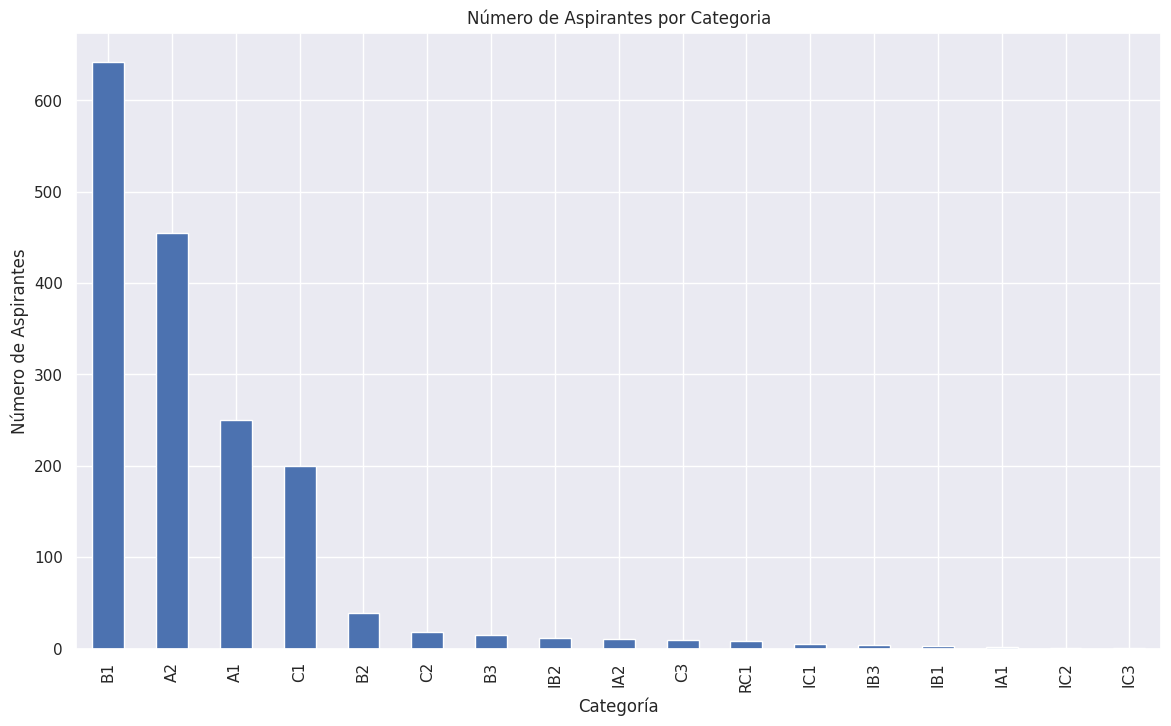

In [27]:
import matplotlib.pyplot as plt

tramitesdf.Categoria.value_counts().nlargest(30).plot(kind='bar', figsize=(14,8))
plt.title("Número de Aspirantes por Categoria")
plt.ylabel('Número de Aspirantes')
plt.xlabel('Categoría');

In [28]:
traccion_count = tramitesdf["IdGenero"].value_counts()
print(traccion_count)

IdGenero
1    1282
2     393
Name: count, dtype: int64


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
plt.rcParams['figure.figsize'] = (10, 6)

Text(0, 0.5, 'Edad')

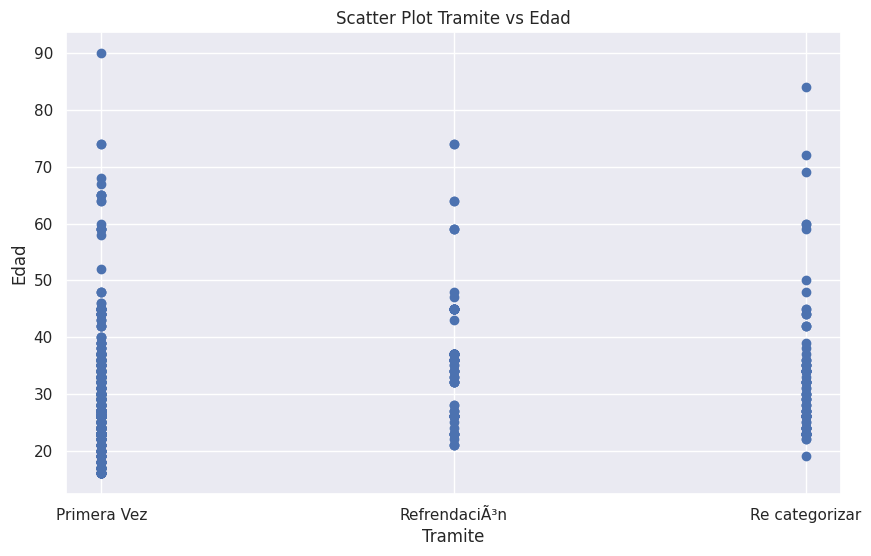

In [30]:
# Grafico de la relación entre “Tramite” y Edad
plt.scatter(tramitesdf["Tramite"], tramitesdf["Edad"])
plt.title("Scatter Plot Tramite vs Edad")
plt.xlabel("Tramite")
plt.ylabel("Edad")

<Axes: xlabel='Tramite', ylabel='Edad'>

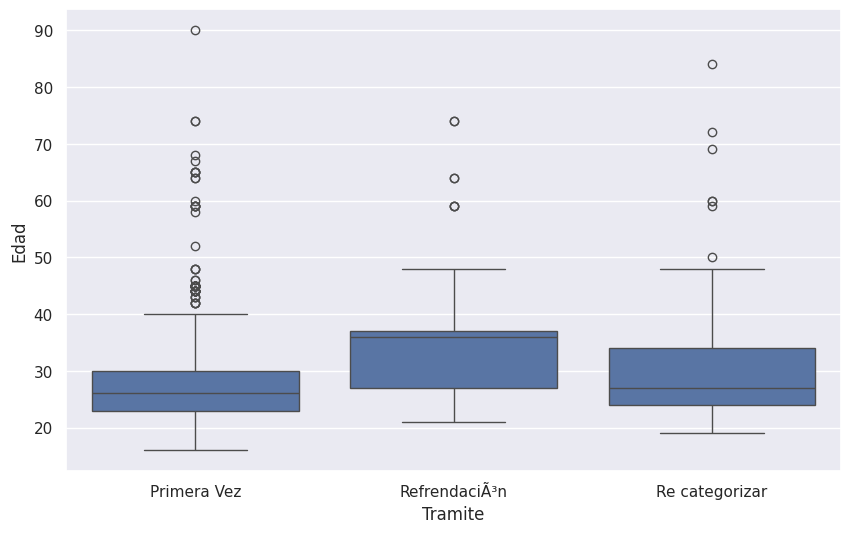

In [31]:
#boxplot to visualize the distribution of "Tramite" with types of "Categoria"
sns.boxplot(x="Tramite", y="Edad",data=tramitesdf)

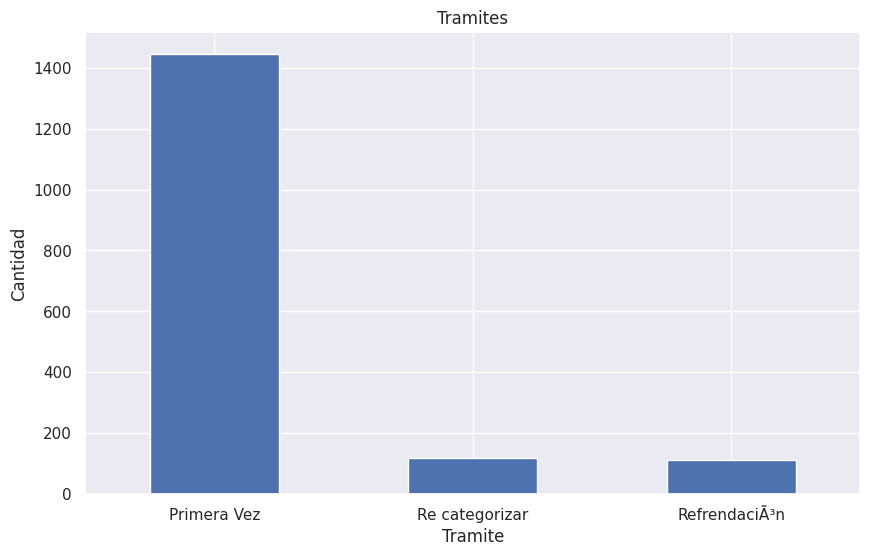

In [32]:
tramitesdf.Tramite.value_counts().plot(kind="bar")
plt.title("Tramites")
plt.xlabel("Tramite")
plt.xticks(rotation=0)
plt.ylabel("Cantidad")
plt.show()

In [33]:
tramitesdf['Edad'].describe()

,Edad
count,1675.000000
mean,28.407164
std,8.177771
min,16.000000
25%,23.000000
50%,26.000000
75%,32.000000
max,90.000000


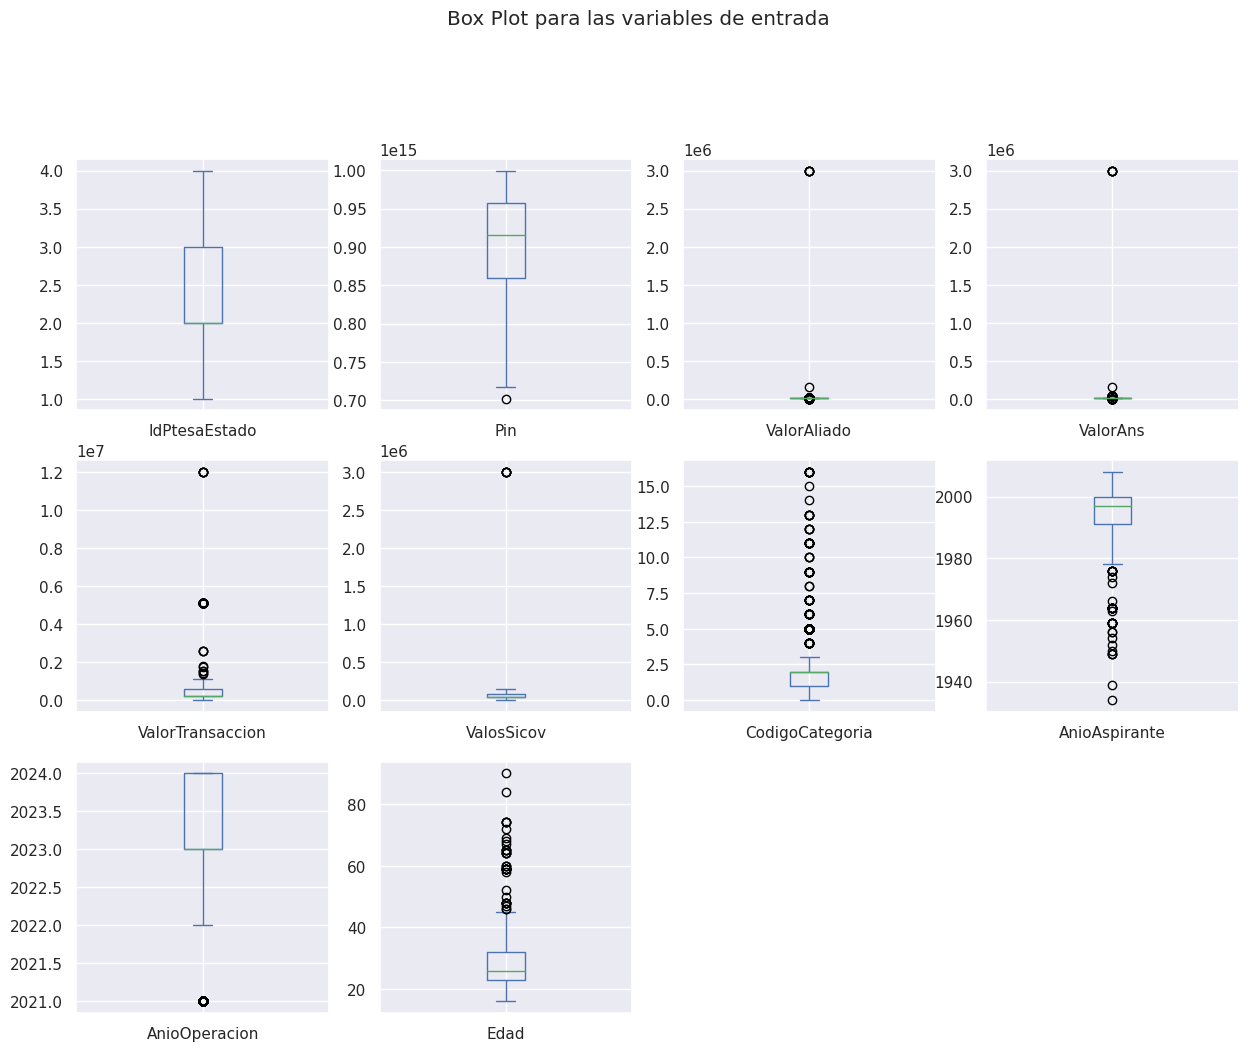

In [34]:
tramitesdf.drop(['IdCotizadorPasarelaPtesa','IdPtesaPin','IdCore','IdGenero','IdTipoIdentificacion','IdTramite'], axis=1).plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(15,15), title='Box Plot para las variables de entrada')
plt.show()

<Axes: >

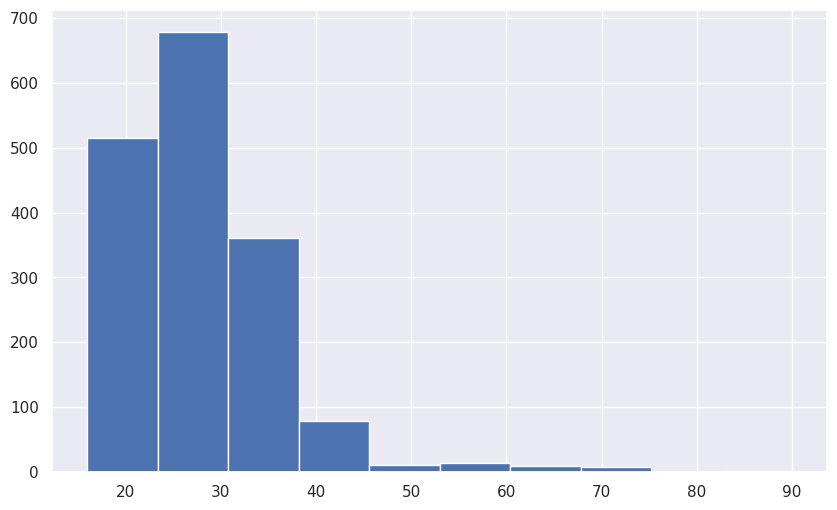

In [35]:
# Histograma del Edad
tramitesdf['Edad'].hist()

In [36]:
# Evaluamos la distribución
# https://www.itl.nist.gov/div898/handbook/eda/section3/eda35b.htm

print(f"Skewness: {tramitesdf['Edad'].skew()}")
print(f"Kurtosis: {tramitesdf['Edad'].kurt()}")

Skewness: 2.2558704685126125
Kurtosis: 8.607693442709884


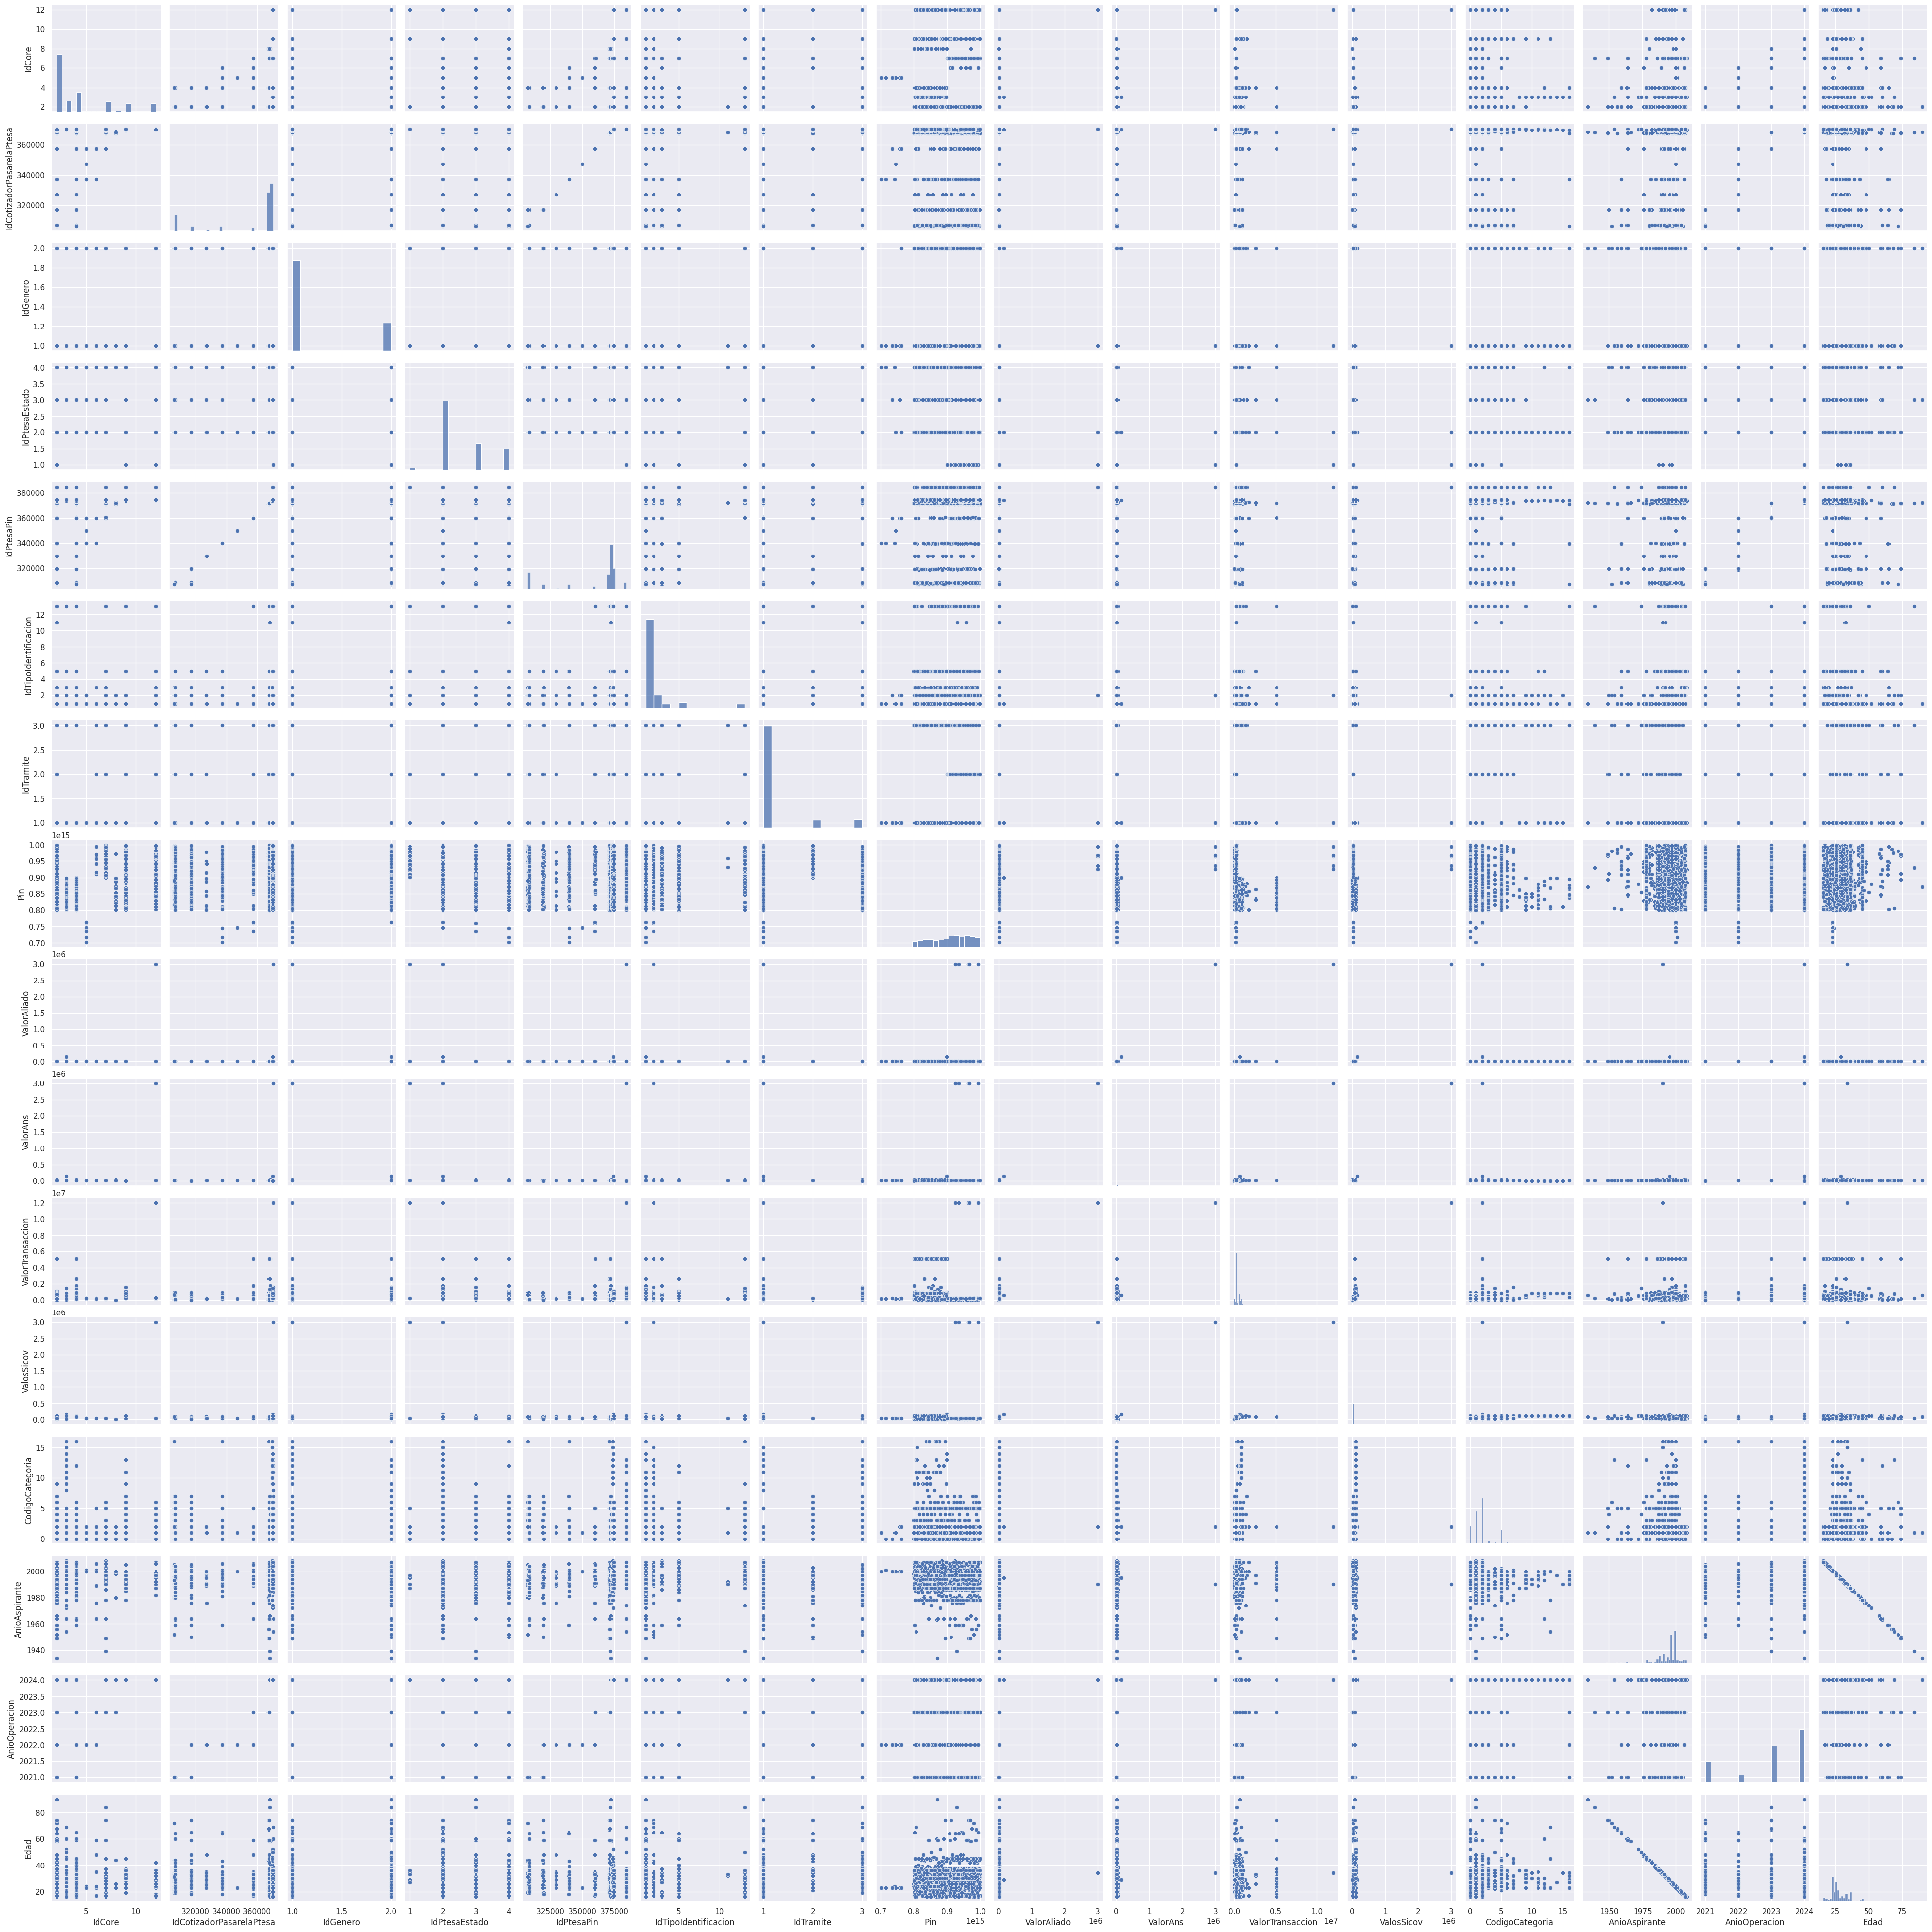

In [37]:
sns.pairplot(tramitesdf)

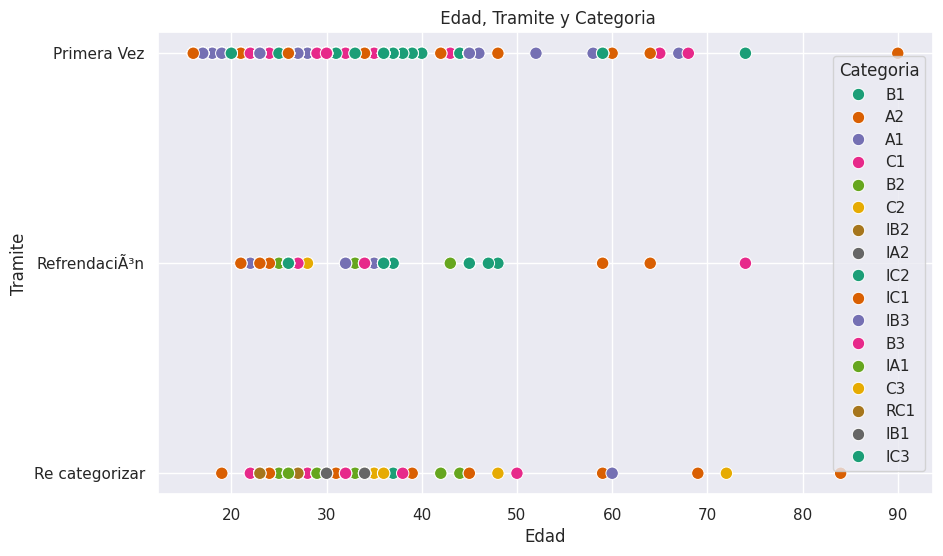

In [38]:
# Relación entre Edad, Tramite y Categoria
# Esta grafica nos permite ver que relaciones existen y como podemos analizarlo

sns.scatterplot(x="Edad", y="Tramite", hue="Categoria", data=tramitesdf, palette="Dark2", s=80)
plt.title(" Edad, Tramite y Categoria")
plt.show()

In [39]:
# Revisamos porcentajes
tramitesdf['IdGenero'].value_counts("normalize = True")

,proportion
IdGenero,
1,0.765373
2,0.234627


## Correlación entre variables



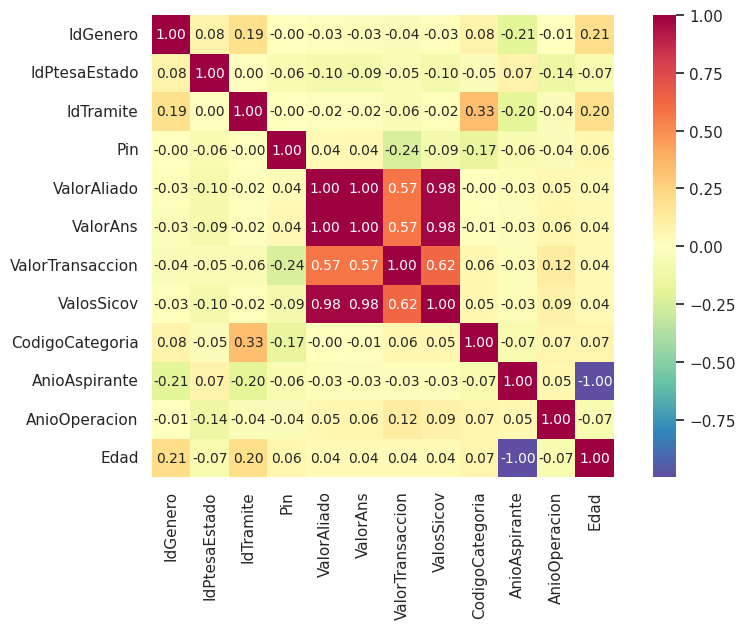

In [40]:
# Correlacion entre variables
numeric_df = tramitesdf.select_dtypes(include=['number']).drop(['IdCotizadorPasarelaPtesa','IdPtesaPin','IdCore','IdTipoIdentificacion'], axis=1)
corrmat = numeric_df.corr()

hm = sns.heatmap(corrmat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 10},
                 yticklabels=numeric_df.columns,
                 xticklabels=numeric_df.columns,
                 cmap="Spectral_r")
plt.show()

#Las variables con mayor correlación positiva son:
 1. Edad y IdGenero con un valor de 0.21
 2. Edad y IdTramite con un valor de 0.20
 3. CodigoCategoria y IdTramite con un valor de 0.33


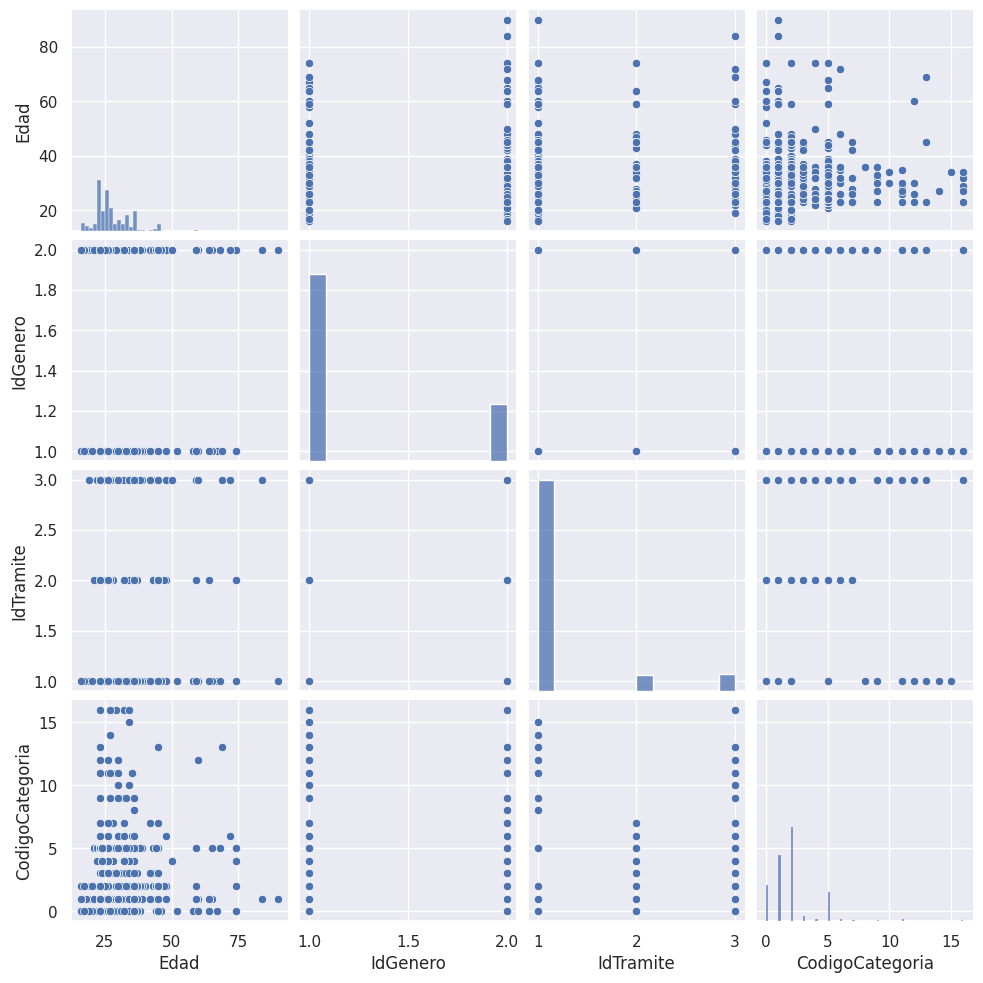

In [44]:
# prompt: sns.pairplot de solo la relacion entre Edad y IdGenero

sns.pairplot(tramitesdf, vars=["Edad", "IdGenero", "IdTramite", "CodigoCategoria"])


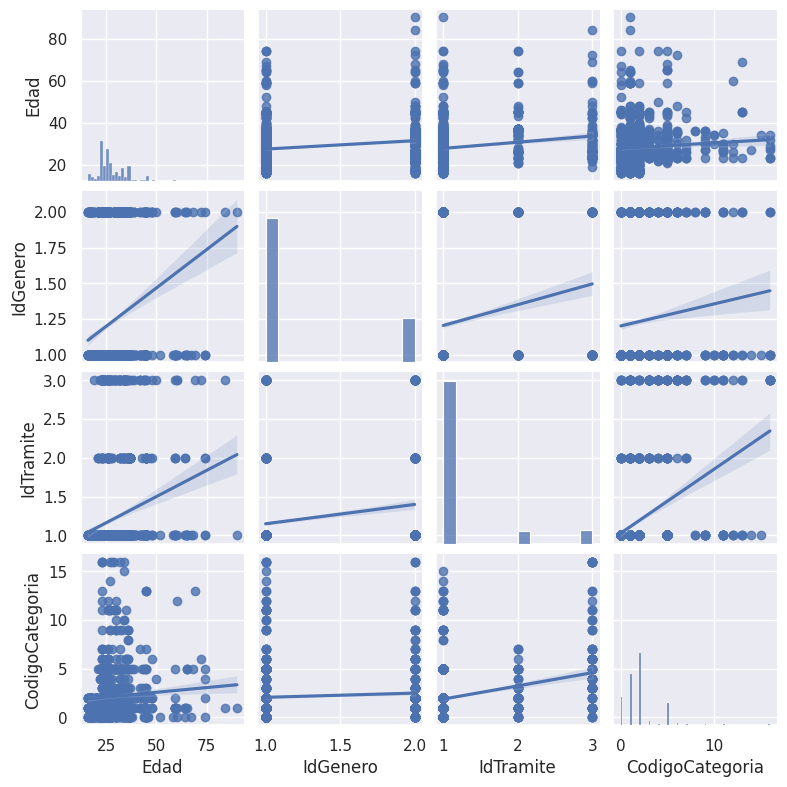

In [45]:
# pair plot with plot type regression
sns.pairplot(tramitesdf,height=2, vars = ["Edad", "IdGenero", "IdTramite", "CodigoCategoria"],  kind="reg")
plt.show()

## Analsis de Correlación:

## Analisis de Correlación: Pearson




In [48]:
#"IdTramite", "CodigoCategoria"
from scipy import stats

corr = stats.pearsonr(tramitesdf["IdTramite"], tramitesdf["CodigoCategoria"])
print("p-value:\t", corr[1])
print("cor:\t\t", corr[0])

p-value:	 6.669857740042983e-45
cor:		 0.33388799094233135


In [49]:
numeric_df = tramitesdf.select_dtypes(include=['number'])
correlationPearson = numeric_df.corr(method='pearson')
correlationPearson

,IdCore,IdCotizadorPasarelaPtesa,IdGenero,IdPtesaEstado,IdPtesaPin,IdTipoIdentificacion,IdTramite,Pin,ValorAliado,ValorAns,ValorTransaccion,ValosSicov,CodigoCategoria,AnioAspirante,AnioOperacion,Edad
IdCore,1.000000,0.265664,-0.031432,-0.084027,0.288865,-0.015658,0.006561,0.040061,0.140056,0.139658,0.009609,0.114215,-0.052571,0.065807,0.350215,-0.068651
IdCotizadorPasarelaPtesa,0.265664,1.000000,-0.028609,-0.087538,0.995220,0.125591,-0.073967,-0.031462,0.038895,0.041349,0.158147,0.064286,0.016148,0.050407,0.928066,-0.065652
IdGenero,-0.031432,-0.028609,1.000000,0.075219,-0.025471,0.083269,0.190278,-0.000840,-0.029129,-0.030804,-0.042704,-0.027851,0.081628,-0.208763,-0.006016,0.207652
IdPtesaEstado,-0.084027,-0.087538,0.075219,1.000000,-0.099323,0.060830,0.000953,-0.063377,-0.096394,-0.093703,-0.052581,-0.099909,-0.045474,0.072200,-0.138829,-0.073247
IdPtesaPin,0.288865,0.995220,-0.025471,-0.099323,1.000000,0.126792,-0.066581,-0.033645,0.059786,0.061959,0.164565,0.085333,0.026486,0.046596,0.932551,-0.061471
IdTipoIdentificacion,-0.015658,0.125591,0.083269,0.060830,0.126792,1.000000,0.044964,-0.046251,0.003863,0.005997,0.012510,0.013355,0.021898,0.082388,0.109152,-0.081843
IdTramite,0.006561,-0.073967,0.190278,0.000953,-0.066581,0.044964,1.000000,-0.003342,-0.020806,-0.021764,-0.061478,-0.023839,0.333888,-0.200582,-0.043195,0.199484
Pin,0.040061,-0.031462,-0.000840,-0.063377,-0.033645,-0.046251,-0.003342,1.000000,0.039087,0.042021,-0.243926,-0.090968,-0.173564,-0.062691,-0.039775,0.056083
ValorAliado,0.140056,0.038895,-0.029129,-0.096394,0.059786,0.003863,-0.020806,0.039087,1.000000,0.999513,0.573713,0.982600,-0.000262,-0.033204,0.054484,0.037121
ValorAns,0.139658,0.041349,-0.030804,-0.093703,0.061959,0.005997,-0.021764,0.042021,0.999513,1.000000,0.570982,0.981284,-0.006985,-0.031991,0.057608,0.035853


Calcula y visualiza la matriz de correlación utilizando un mapa de calor.

<Axes: >

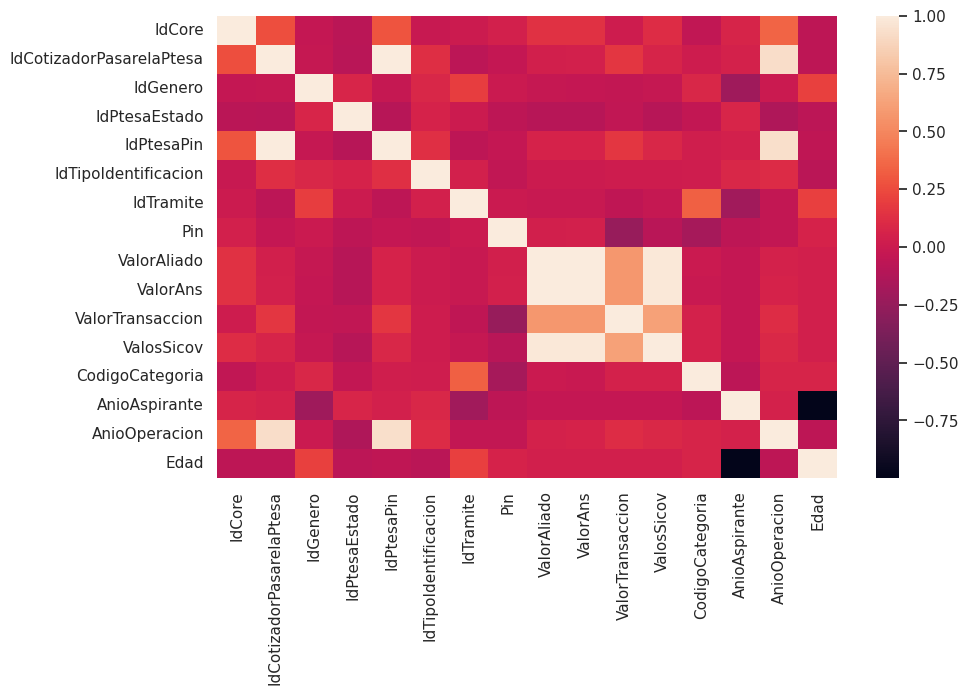

In [50]:
sns.heatmap(correlationPearson,xticklabels=correlationPearson.columns,
            yticklabels=correlationPearson.columns)

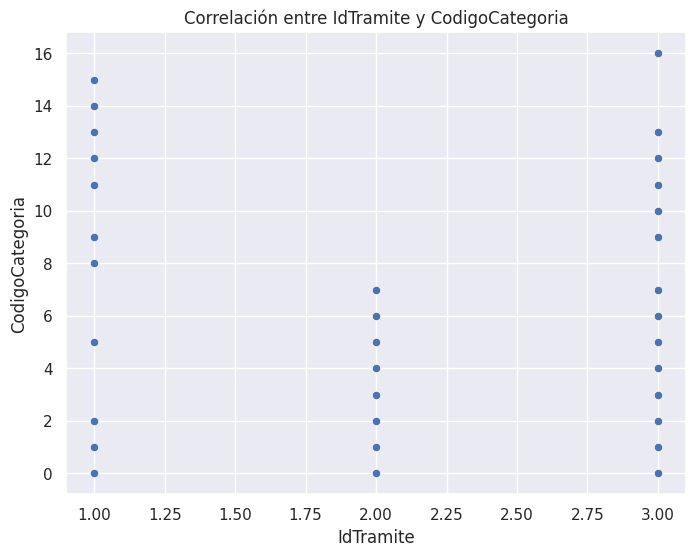

Coeficiente de correlación de Pearson: 0.33388799094233207


In [53]:
# visualizar la correlacion entre dos variables #"IdTramite", "CodigoCategoria"

# Selecciona las dos variables que deseas analizar
variable1 = 'IdTramite'
variable2 = 'CodigoCategoria'

# Crea un scatter plot para visualizar la correlación
plt.figure(figsize=(8, 6))
sns.scatterplot(x=variable1, y=variable2, data=tramitesdf)
plt.title(f'Correlación entre {variable1} y {variable2}')
plt.xlabel(variable1)
plt.ylabel(variable2)
plt.show()

# Calcula el coeficiente de correlación de Pearson
correlationPearson = tramitesdf[variable1].corr(tramitesdf[variable2], method='pearson')
print(f'Coeficiente de correlación de Pearson: {correlationPearson}')


## Analisis de Correlación: Kendall

In [55]:
# tramitesdf visualizar la correlacion entre dos variables #"IdTramite", "CodigoCategoria"

from scipy import stats

corrKedall = stats.kendalltau(tramitesdf["IdTramite"], tramitesdf["CodigoCategoria"])
print("p-value:\t", corrKedall[1])
print("cor:\t\t", corrKedall[0])

p-value:	 3.267725907210588e-27
cor:		 0.23592911064032307


In [56]:
numeric_df = tramitesdf.select_dtypes(include=['number'])
correlationKendall = numeric_df.corr(method='kendall')
correlationKendall

,IdCore,IdCotizadorPasarelaPtesa,IdGenero,IdPtesaEstado,IdPtesaPin,IdTipoIdentificacion,IdTramite,Pin,ValorAliado,ValorAns,ValorTransaccion,ValosSicov,CodigoCategoria,AnioAspirante,AnioOperacion,Edad
IdCore,1.000000,0.306873,-0.027102,0.003500,0.307048,0.078826,-0.031333,-0.131070,0.251679,0.263438,0.144069,0.167717,-0.000270,0.012318,0.282945,-0.016949
IdCotizadorPasarelaPtesa,0.306873,1.000000,0.008031,-0.146982,0.999499,0.083057,-0.008804,-0.060321,0.405516,0.631316,0.369286,0.336899,0.063250,-0.012487,0.816068,0.003618
IdGenero,-0.027102,0.008031,1.000000,0.076761,0.007563,0.099871,0.211894,-0.004926,0.012788,-0.036774,0.001667,0.014693,0.061183,-0.187185,0.011789,0.184766
IdPtesaEstado,0.003500,-0.146982,0.076761,1.000000,-0.146725,0.077821,-0.016151,-0.032361,-0.089984,-0.130356,-0.098511,-0.074404,-0.010262,0.083890,-0.167278,-0.091101
IdPtesaPin,0.307048,0.999499,0.007563,-0.146725,1.000000,0.083122,-0.008753,-0.060545,0.405723,0.631385,0.369635,0.337106,0.063502,-0.012218,0.816082,0.003388
IdTipoIdentificacion,0.078826,0.083057,0.099871,0.077821,0.083122,1.000000,0.037681,-0.092145,0.107815,0.055390,0.095865,0.049295,-0.023018,0.146374,0.083013,-0.148153
IdTramite,-0.031333,-0.008804,0.211894,-0.016151,-0.008753,0.037681,1.000000,0.038209,-0.063823,0.024048,-0.009913,-0.061970,0.235929,-0.188193,0.000890,0.180114
Pin,-0.131070,-0.060321,-0.004926,-0.032361,-0.060545,-0.092145,0.038209,1.000000,-0.478518,-0.025448,-0.326349,-0.419880,-0.085116,-0.042975,-0.040085,0.032337
ValorAliado,0.251679,0.405516,0.012788,-0.089984,0.405723,0.107815,-0.063823,-0.478518,1.000000,0.361573,0.658806,0.891733,0.126549,-0.015649,0.435484,0.018947
ValorAns,0.263438,0.631316,-0.036774,-0.130356,0.631385,0.055390,0.024048,-0.025448,0.361573,1.000000,0.368745,0.267011,-0.029062,-0.136007,0.736720,0.123612


<Axes: >

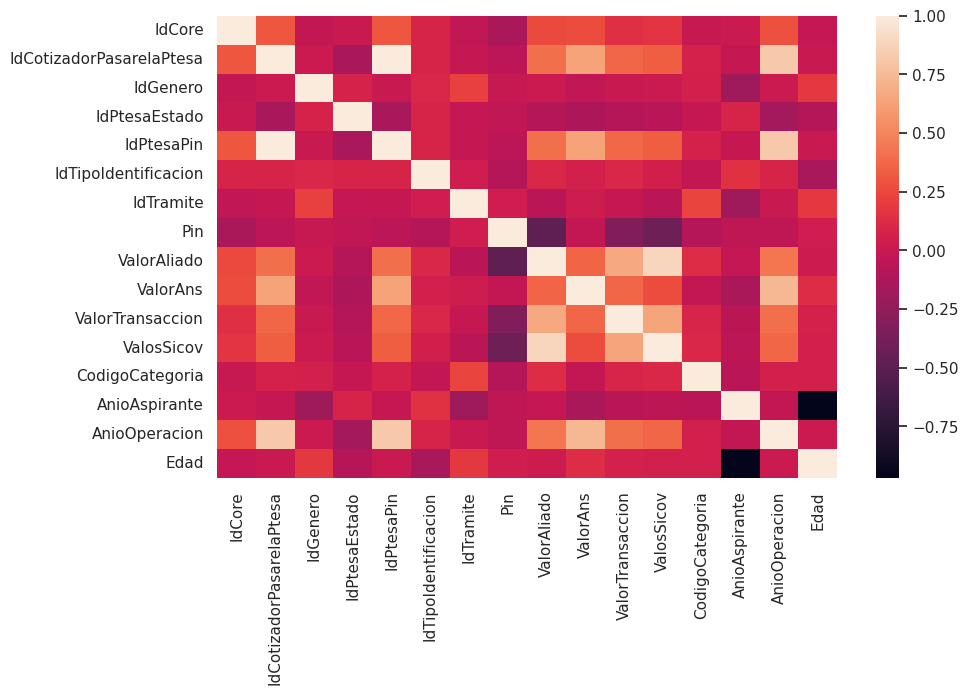

In [57]:
sns.heatmap(correlationKendall,xticklabels=correlationKendall.columns,
            yticklabels=correlationKendall.columns)

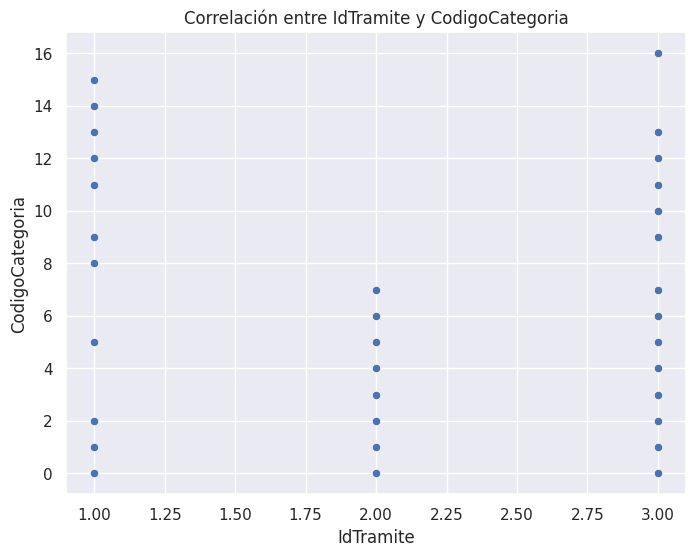

Coeficiente de correlación de Kendall: 0.23592911064032307


In [58]:
# tramitesdf visualizar la correlacion entre dos variables #"IdTramite", "CodigoCategoria"
# Selecciona las dos variables que deseas analizar
variable1 = 'IdTramite'
variable2 = 'CodigoCategoria'

# Crea un scatter plot para visualizar la correlación
plt.figure(figsize=(8, 6))
sns.scatterplot(x=variable1, y=variable2, data=tramitesdf)
plt.title(f'Correlación entre {variable1} y {variable2}')
plt.xlabel(variable1)
plt.ylabel(variable2)
plt.show()

# Calcula el coeficiente de correlación de Kendall
correlationKendall = tramitesdf[variable1].corr(tramitesdf[variable2], method='kendall')
print(f'Coeficiente de correlación de Kendall: {correlationKendall}')

## Analisis de Correlación: Spearman

In [60]:
# tramitesdf visualizar la correlacion entre dos variables #"IdTramite", "CodigoCategoria"
from scipy import stats

corrSpearman = stats.spearmanr(tramitesdf["IdTramite"], tramitesdf["CodigoCategoria"])
print("p-value:\t", corrSpearman[1])
print("cor:\t\t", corrSpearman[0])

p-value:	 1.677122730883042e-27
cor:		 0.2610715866004386


In [61]:
numeric_df = tramitesdf.select_dtypes(include=['number'])
correlationSpearman = numeric_df.corr(method='spearman')
correlationSpearman

,IdCore,IdCotizadorPasarelaPtesa,IdGenero,IdPtesaEstado,IdPtesaPin,IdTipoIdentificacion,IdTramite,Pin,ValorAliado,ValorAns,ValorTransaccion,ValosSicov,CodigoCategoria,AnioAspirante,AnioOperacion,Edad
IdCore,1.000000,0.406884,-0.029797,0.003646,0.407077,0.090427,-0.035247,-0.177220,0.353679,0.331345,0.216898,0.246776,-0.000344,0.017042,0.327310,-0.023083
IdCotizadorPasarelaPtesa,0.406884,1.000000,0.009834,-0.189222,0.999903,0.107046,-0.010834,-0.092063,0.508952,0.804600,0.500131,0.410816,0.087205,-0.010132,0.934440,-0.000837
IdGenero,-0.029797,0.009834,1.000000,0.080662,0.009260,0.104092,0.215492,-0.006031,0.014515,-0.043789,0.002019,0.016694,0.067340,-0.217906,0.012609,0.217149
IdPtesaEstado,0.003646,-0.189222,0.080662,1.000000,-0.188917,0.085051,-0.017152,-0.041506,-0.106008,-0.161100,-0.121777,-0.088353,-0.011443,0.102146,-0.187637,-0.111892
IdPtesaPin,0.407077,0.999903,0.009260,-0.188917,1.000000,0.107116,-0.010742,-0.092347,0.509319,0.804624,0.500451,0.411162,0.087478,-0.009800,0.934444,-0.001122
IdTipoIdentificacion,0.090427,0.107046,0.104092,0.085051,0.107116,1.000000,0.039821,-0.118001,0.128586,0.068614,0.122397,0.059750,-0.026323,0.175940,0.093132,-0.179569
IdTramite,-0.035247,-0.010834,0.215492,-0.017152,-0.010742,0.039821,1.000000,0.047870,-0.072851,0.027268,-0.013714,-0.070197,0.261072,-0.223659,0.000551,0.216087
Pin,-0.177220,-0.092063,-0.006031,-0.041506,-0.092347,-0.118001,0.047870,1.000000,-0.668527,-0.037611,-0.484513,-0.587317,-0.113611,-0.061295,-0.053377,0.047057
ValorAliado,0.353679,0.508952,0.014515,-0.106008,0.509319,0.128586,-0.072851,-0.668527,1.000000,0.425128,0.784486,0.917149,0.157398,-0.019980,0.485732,0.025487
ValorAns,0.331345,0.804600,-0.043789,-0.161100,0.804624,0.068614,0.027268,-0.037611,0.425128,1.000000,0.432478,0.303197,-0.036171,-0.172716,0.825874,0.157185


<Axes: >

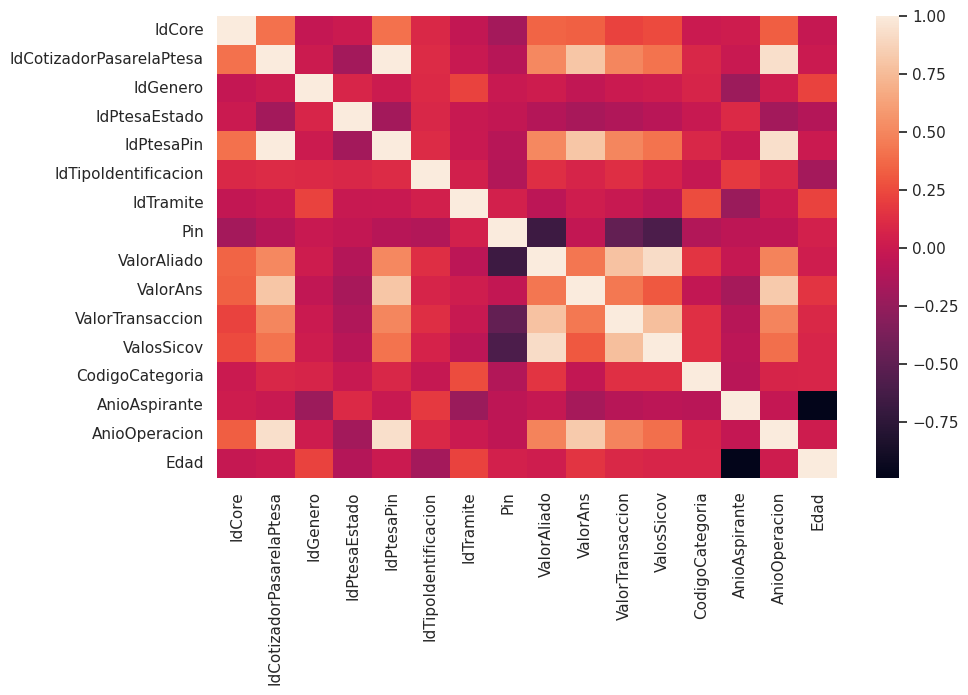

In [62]:
sns.heatmap(correlationSpearman,xticklabels=correlationSpearman.columns,
            yticklabels=correlationSpearman.columns)

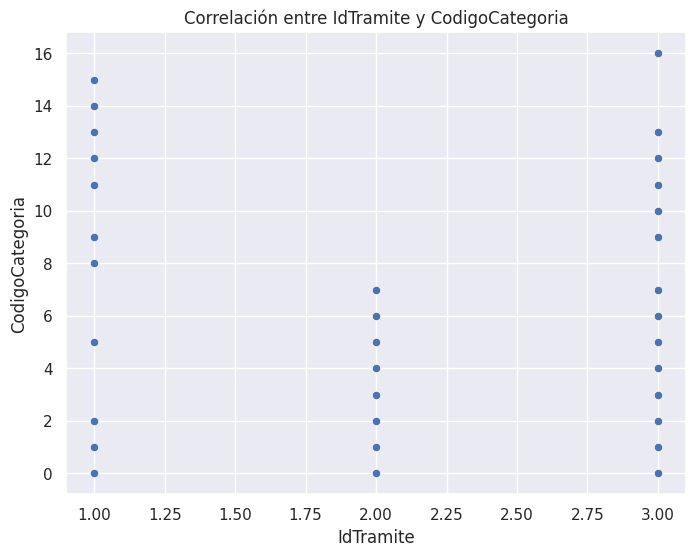

Coeficiente de correlación de Spearman: 0.2610715866004386


In [64]:
# tramitesdf visualizar la correlacion entre dos variables #"IdTramite", "CodigoCategoria"
# prompt: visualizar la correlacion entre dos variables

# Selecciona las dos variables que deseas analizar
variable1 = 'IdTramite'
variable2 = 'CodigoCategoria'

# Crea un scatter plot para visualizar la correlación
plt.figure(figsize=(8, 6))
sns.scatterplot(x=variable1, y=variable2, data=tramitesdf)
plt.title(f'Correlación entre {variable1} y {variable2}')
plt.xlabel(variable1)
plt.ylabel(variable2)
plt.show()

# Calcula el coeficiente de correlación de Spearman
correlationSpearman = tramitesdf[variable1].corr(tramitesdf[variable2], method='spearman')
print(f'Coeficiente de correlación de Spearman: {correlationSpearman}')

In [65]:
print(f'Coeficiente de correlación de Spearman: {correlationSpearman}')
print(f'Coeficiente de correlación de Kendall: {correlationKendall}')
print(f'Coeficiente de correlación de Pearson: {correlationPearson}')

Coeficiente de correlación de Spearman: 0.2610715866004386
Coeficiente de correlación de Kendall: 0.23592911064032307
Coeficiente de correlación de Pearson: 0.33388799094233207


# Los pasos realizados hasta esta tarea se pueden resumir en las siguientes etapas:

 1. Limpieza de datos:
    - Identificación y manejo de valores faltantes en varias columnas, incluyendo 'precio', 'caballos-fuerza', 'perdidas-normalizadas', 'num-puertas', y 'pico-rpm'.
    - Reemplazo de valores faltantes por la media o la moda según corresponda.
    - Eliminación de filas con valores faltantes en la columna 'precio'.
    - Conversión de tipos de datos a formatos apropiados (float, int).

 2. Transformación de datos:
    - Conversión de millas por galón a kilómetros por galón para las columnas 'millas_por_galon_ciudad' y 'millas_por_galon_carretera'.
    - Renombramiento de columnas para mayor claridad.

 3. Análisis exploratorio de datos:
    - Visualización de la distribución de variables utilizando histogramas y gráficos de caja.
    - Creación de gráficos de dispersión para explorar relaciones entre variables.
    - Análisis de la correlación entre variables numéricas utilizando mapas de calor y coeficientes de correlación.

 4. Análisis de correlación:
    - Cálculo de coeficientes de correlación de Pearson, Kendall y Spearman para variables seleccionadas.
    - Visualización de la correlación utilizando gráficos de dispersión y mapas de calor.
    - Comparación entre los coeficientes de correlación calcualdados

 En resumen, se ha realizado un proceso de limpieza, transformación y análisis exploratorio de
 datos para preparar el conjunto de datos para su uso en análisis posteriores o modelado predictivo.
 Se ha prestado especial atención a la identificación y manejo de valores faltantes,
 la corrección de formatos de datos y la exploración de relaciones entre variables.

# Conclusiones

El análisis exploratorio de datos y el preprocesamiento realizado revelan información crucial sobre el conjunto de datos de automóviles. Se abordaron los valores faltantes utilizando estrategias de imputación, mientras que las transformaciones de datos aseguraron la coherencia y la interpretabilidad.

Los análisis de correlación, revelaron fuertes relaciones positivas entre variables como la distancia entre ejes, la longitud, el ancho, el peso en vacío, el tamaño del motor, la potencia y el precio, lo que permitió orientar de forma objetiva el analisis.

El coeficiente de correlación de Pearson para "precio" y "tamaño del motor" fue de 0.8615, lo que indica una fuerte relación lineal positiva, evidenciado en las graficas de dispersión en la que relacionan las dos variables. Los coeficientes de Kendall y Spearman también confirmaron esta fuerte asociación, con valores: Coeficiente de correlación de Spearman: 0.8077705395447443
Coeficiente de correlación de Kendall: 0.6413617291317495
Coeficiente de correlación de Pearson: 0.861546091207975

Estos hallazgos sugieren que variables como el tamaño del motor, la potencia y las dimensiones del vehículo son predictores significativos del precio del automóvil. Además, el consumo de combustible muestra una relación inversa con el tamaño del motor y la potencia.

Este análisis proporciona una base sólida para el desarrollo de modelos predictivos para estimar el precio de los automóviles en función de sus características.
